# TLUT
Thermal radiation related Look-up-table (TLUT).

This notebook is not necessarily intended to be run by the users because it is just a way to generate a simple thermal radiation related model data (based on Near-Earth Asteroid Thermal Model, NEATM, originally by [Harris A. W. 1998 Icar. 131, 291](https://ui.adsabs.harvard.edu/abs/1998Icar..131..291H/abstract)).

The calculation is based on the package [`yssbtmpy`](https://github.com/ysBach/yssbtmpy) distributed under the MIT license.

In [1]:
%config InlineBackend.figure_format = 'retina'
# %matplotlib notebook
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt

InteractiveShell.ast_node_interactivity = 'last_expr'

# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
import yssbtmpy as tm
import pandas as pd

In [2]:
flams = []
alphas = np.arange(0, 180, 5)
rhels = np.arange(0.5, 20, 0.5)
for alpha in alphas:
    _flams = []
    for rhel in rhels:
        sb = tm.NEATMBody(r_hel=rhel, temp_eqm_1au=450, alpha=alpha, skip_quantity=True)
        _flams.append(0.9*sb.calc_flux_ther(5)[0])  # emissivity 0.9
    flams.append(np.array(_flams))
flams = np.array(flams)
abmags = np.around(tm.flam2ab(flams, 5), 3)
df = pd.DataFrame(abmags, index=alphas, columns=rhels)
df.to_csv("abmags_neatm_T1_450_5um.csv")

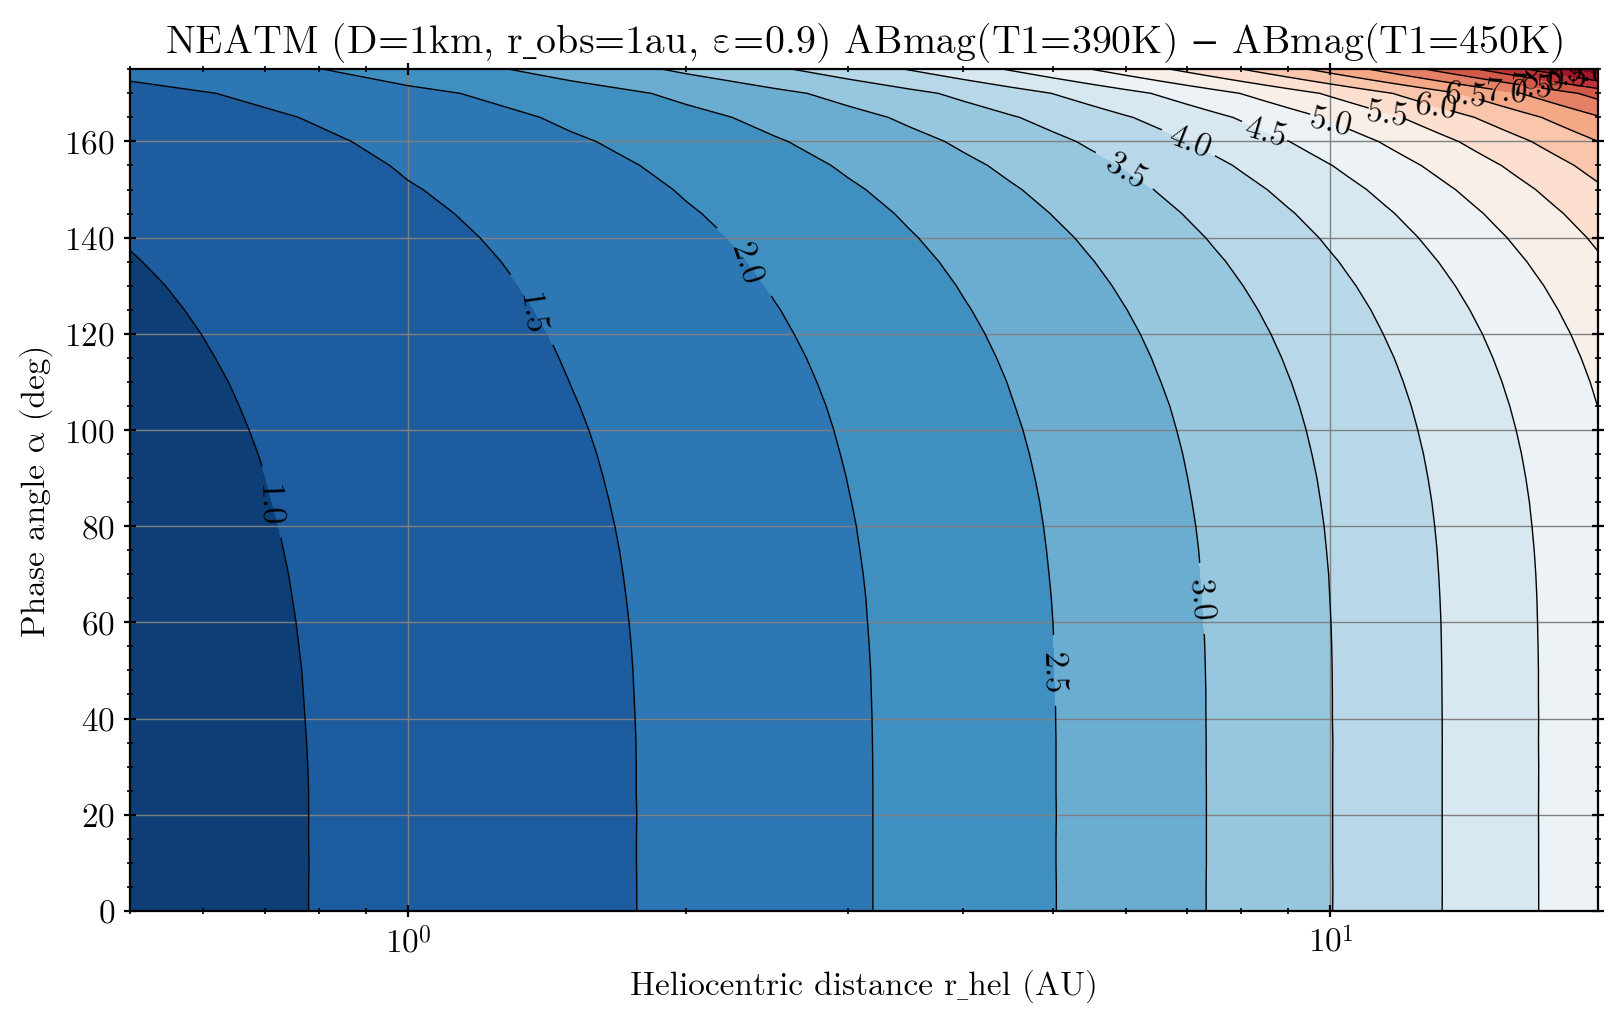

In [20]:
%config InlineBackend.figure_format = 'retina'
# %matplotlib notebook
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt

InteractiveShell.ast_node_interactivity = 'last_expr'

# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'latin modern math', 'font.size':12, 'mathtext.fontset':'stix',
    'axes.formatter.use_mathtext': True, 'axes.formatter.limits': (-4, 4),
    'axes.grid': True, 'grid.color': 'gray', 'grid.linewidth': 0.5,
    'xtick.top': True, 'ytick.right': True,
    'xtick.direction': 'inout', 'ytick.direction': 'inout',
    'xtick.minor.size': 2.0, 'ytick.minor.size': 2.0,  # default 2.0
    'xtick.major.size': 4.0, 'ytick.major.size': 4.0,  # default 3.5
    'xtick.minor.visible': True, 'ytick.minor.visible': True
})

flams = []
alphas = np.arange(0, 180, 5)
rhels = np.arange(0.5, 20, 0.5)
for alpha in alphas:
    _flams = []
    for rhel in rhels:
        sb = tm.NEATMBody(r_hel=rhel, temp_eqm_1au=390, alpha=alpha, skip_quantity=True)
        _flams.append(0.9*sb.calc_flux_ther(5)[0])  # emissivity 0.9
    flams.append(np.array(_flams))
flams = np.array(flams)
abmags = np.around(tm.flam2ab(flams, 5), 3)
df = pd.DataFrame(abmags, index=alphas, columns=rhels)
dmag = df - pd.read_csv("abmags_neatm_T1_450_5um.csv", index_col=0).to_numpy()

fig, axs = plt.subplots(1, 1, figsize=(8, 5), layout="constrained", gridspec_kw=None, sharex=False, sharey=False)

#axs[0].
axs.contourf(rhels, alphas, dmag, levels=20, cmap="RdBu_r")
cs = axs.contour(rhels, alphas, dmag, levels=20, colors="k", linewidths=0.5)
axs.clabel(cs, inline=True, fontsize=12)
axs.set(
    xscale="log",
    xlabel="Heliocentric distance r_hel (AU)",
    ylabel="Phase angle α (deg)",
    title="NEATM (D=1km, r_obs=1au, ε=0.9) ABmag(T1=390K) $-$ ABmag(T1=450K)"
)
plt.show();

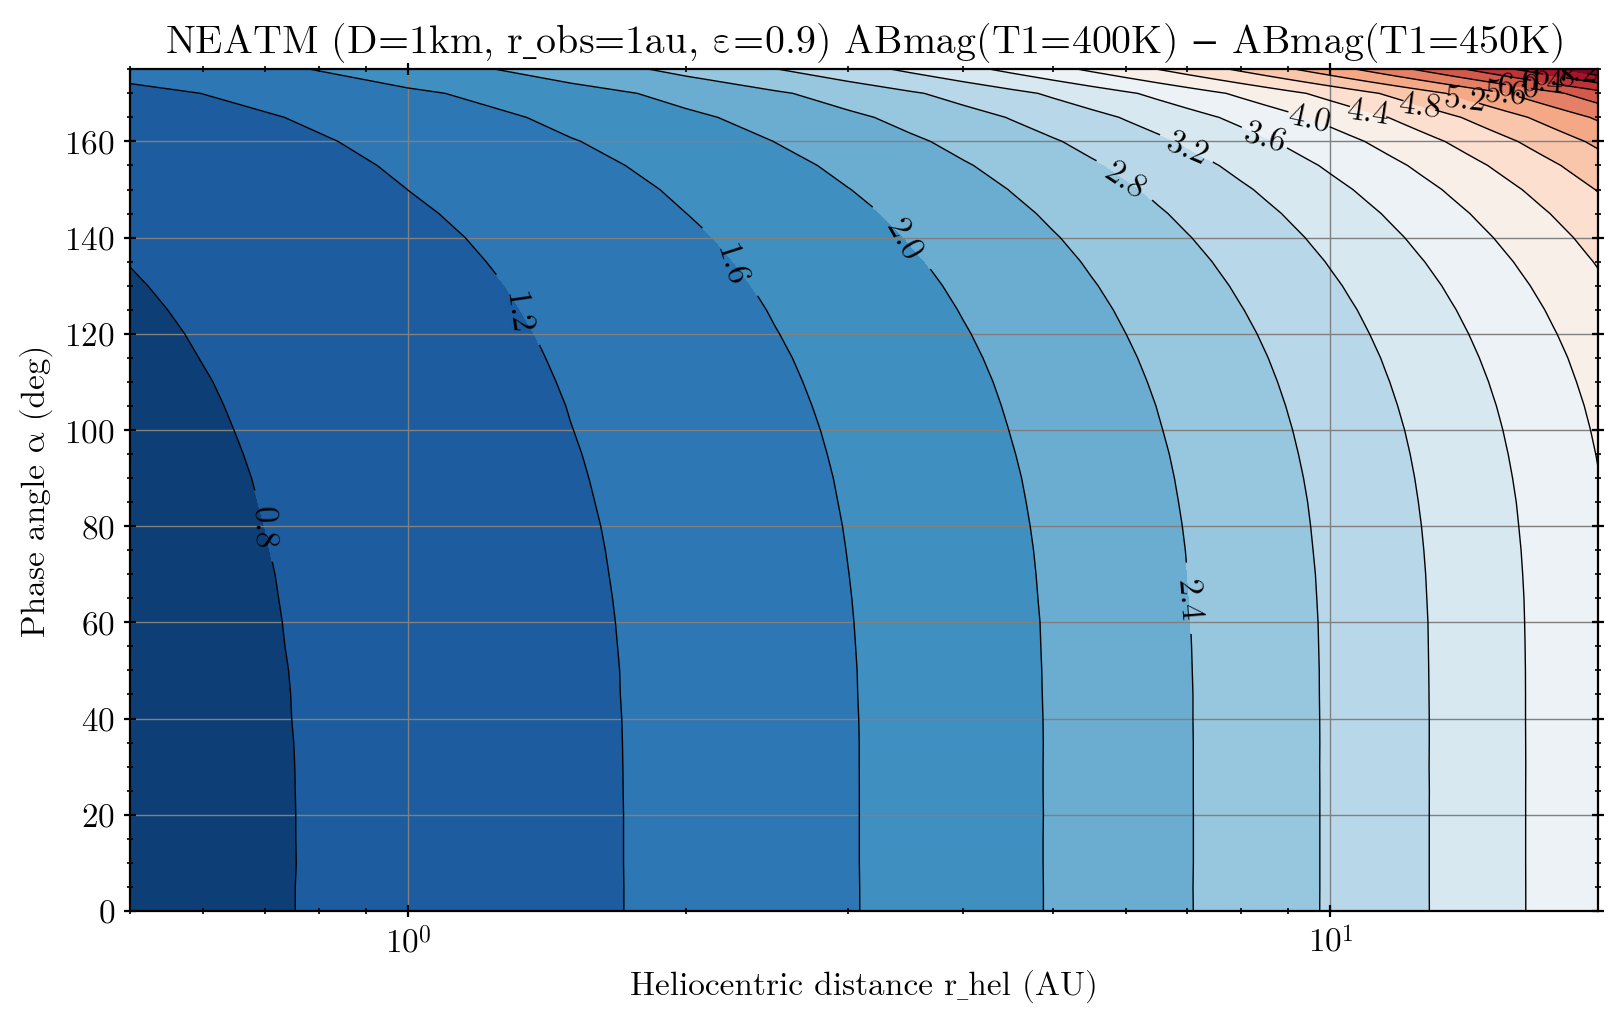

In [22]:
%config InlineBackend.figure_format = 'retina'
# %matplotlib notebook
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt

InteractiveShell.ast_node_interactivity = 'last_expr'

# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'latin modern math', 'font.size':12, 'mathtext.fontset':'stix',
    'axes.formatter.use_mathtext': True, 'axes.formatter.limits': (-4, 4),
    'axes.grid': True, 'grid.color': 'gray', 'grid.linewidth': 0.5,
    'xtick.top': True, 'ytick.right': True,
    'xtick.direction': 'inout', 'ytick.direction': 'inout',
    'xtick.minor.size': 2.0, 'ytick.minor.size': 2.0,  # default 2.0
    'xtick.major.size': 4.0, 'ytick.major.size': 4.0,  # default 3.5
    'xtick.minor.visible': True, 'ytick.minor.visible': True
})

flams = []
alphas = np.arange(0, 180, 5)
rhels = np.arange(0.5, 20, 0.5)
for alpha in alphas:
    _flams = []
    for rhel in rhels:
        sb = tm.NEATMBody(r_hel=rhel, temp_eqm_1au=400, alpha=alpha, skip_quantity=True)
        _flams.append(0.9*sb.calc_flux_ther(5)[0])  # emissivity 0.9
    flams.append(np.array(_flams))
flams = np.array(flams)
abmags = np.around(tm.flam2ab(flams, 5), 3)
df = pd.DataFrame(abmags, index=alphas, columns=rhels)
dmag = df - pd.read_csv("abmags_neatm_T1_450_5um.csv", index_col=0).to_numpy()

fig, axs = plt.subplots(1, 1, figsize=(8, 5), layout="constrained", gridspec_kw=None, sharex=False, sharey=False)

#axs[0].
axs.contourf(rhels, alphas, dmag, levels=20, cmap="RdBu_r")
cs = axs.contour(rhels, alphas, dmag, levels=20, colors="k", linewidths=0.5)
axs.clabel(cs, inline=True, fontsize=12)
axs.set(
    xscale="log",
    xlabel="Heliocentric distance r_hel (AU)",
    ylabel="Phase angle α (deg)",
    title="NEATM (D=1km, r_obs=1au, ε=0.9) ABmag(T1=400K) $-$ ABmag(T1=450K)"
)
plt.show();

In [7]:
pd.read_csv("abmags_neatm_T1_450_5um.csv", index_col=0)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5
0,11.814,14.008,15.673,17.069,18.293,19.397,20.409,21.350,22.231,23.064,...,34.840,35.298,35.748,36.192,36.628,37.058,37.481,37.899,38.311,38.717
5,11.818,14.012,15.677,17.073,18.297,19.401,20.413,21.354,22.235,23.068,...,34.845,35.302,35.753,36.196,36.632,37.062,37.486,37.903,38.315,38.722
10,11.831,14.025,15.690,17.085,18.310,19.413,20.426,21.366,22.248,23.080,...,34.857,35.315,35.765,36.208,36.645,37.074,37.498,37.916,38.328,38.734
15,11.851,14.046,15.711,17.106,18.331,19.434,20.447,21.387,22.269,23.101,...,34.878,35.336,35.786,36.229,36.666,37.095,37.519,37.937,38.349,38.755
20,11.880,14.075,15.740,17.136,18.361,19.464,20.477,21.417,22.299,23.131,...,34.908,35.366,35.816,36.259,36.695,37.125,37.549,37.967,38.378,38.785
25,11.916,14.113,15.778,17.174,18.399,19.503,20.516,21.456,22.338,23.170,...,34.947,35.405,35.855,36.298,36.735,37.165,37.588,38.006,38.418,38.824
30,11.960,14.159,15.826,17.222,18.447,19.552,20.564,21.505,22.387,23.219,...,34.997,35.454,35.905,36.348,36.784,37.214,37.638,38.055,38.467,38.874
35,12.012,14.214,15.882,17.280,18.505,19.610,20.623,21.564,22.446,23.279,...,35.057,35.515,35.965,36.408,36.844,37.274,37.698,38.116,38.527,38.934
40,12.071,14.277,15.948,17.347,18.573,19.679,20.692,21.634,22.516,23.349,...,35.129,35.587,36.037,36.480,36.917,37.347,37.770,38.188,38.600,39.006
45,12.139,14.350,16.023,17.424,18.652,19.758,20.773,21.715,22.598,23.431,...,35.215,35.673,36.123,36.566,37.003,37.433,37.856,38.274,38.686,39.092
